In [2]:
# 학습 데이터 생성
import torch

# 입력이 다음과 같을때 (x_train = torch.tensor([], dtype = torch.float))
x_train = torch.FloatTensor([[1], [2], [3], [4], [5], [2.5], [3.5], [0], [3.1], [2.7], [2.8], [2.9]])
# 출력 결과
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])


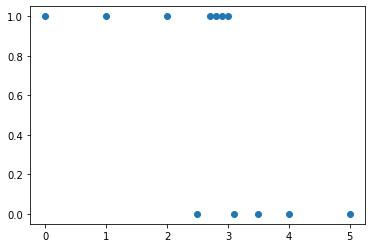

In [16]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train)
plt.show()

In [22]:
w = torch.randn((1, 1), requires_grad = True) # 1,1 차원
b = torch.randn((1, 1), requires_grad = True)

# use optimizer 
optim = torch.optim.SGD([w, b], lr = 1.0)

for epoch in range(1001):
  # w.requires_grad_(True)
  # b.requires_grad_(True)

  h = torch.sigmoid(torch.mm(x_train, w) + b) # 가설 함수
  c = - y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h)
  cost = torch.mean(c)

  optim.zero_grad() # gradient 초기화 안하면 이상한 값이 생김 기울기값을누적해나가기때문 
  # with torch.no_grad():
  #   w.grad = torch.FloatTensor([[0]])
  #   b.grad = torch.FloatTensor([[0]])

  cost.backward() # 기울기 계산 
  optim.step() # update parameter
  
  with torch.no_grad(): # 여기서는 그래프를 그리지 않음 기울기를 계산(학습)하는 부분이 아니기 때문 
   # update parameter
    # w = w - lr * w.grad
    # b = b - lr * b.grad

    if epoch % 100 == 0:
      print(f"w = {w.item()}, b: {b.item()}, cost: {cost.item()}")


w = -0.3055826425552368, b: 0.08787544071674347, cost: 0.7118533253669739
w = -1.4546351432800293, b: 4.417247772216797, cost: 0.42000624537467957
w = -1.9003045558929443, b: 5.779436111450195, cost: 0.3986565172672272
w = -2.17557954788208, b: 6.613351345062256, cost: 0.39079150557518005
w = -2.368241786956787, b: 7.194348335266113, cost: 0.38699355721473694
w = -2.511317253112793, b: 7.624607086181641, cost: 0.38491562008857727
w = -2.6213176250457764, b: 7.954779624938965, cost: 0.38369348645210266
w = -2.707824945449829, b: 8.214085578918457, cost: 0.3829402029514313
w = -2.7769410610198975, b: 8.421053886413574, cost: 0.3824605941772461
w = -2.8327999114990234, b: 8.58819580078125, cost: 0.38214802742004395
w = -2.8783411979675293, b: 8.724382400512695, cost: 0.38194045424461365


In [24]:
with torch.no_grad():
  x_test = torch.tensor([[4.5], [1.1]],dtype = torch.float)
  y_test = torch.sigmoid(torch.mm(x_test, w) + b)
  y_test[y_test > 0.5] = 1
  y_test[y_test <= 0.5] = 0
  print(y_test)


tensor([[0.],
        [1.]])


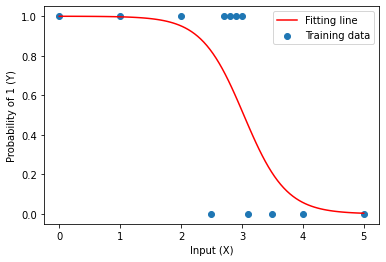

In [31]:
# Test
with torch.no_grad():
  x_tmp = torch.linspace(0, 5, 100).unsqueeze(1)
  y_tmp = torch.sigmoid(torch.mm(x_tmp, w) + b)

  plt.scatter(x_train, y_train, label = "Training data")
  # 점과 선 색 변경
  plt.ylabel("Probability of 1 (Y)") 
  plt.xlabel("Input (X)")

  # 범례
  plt.plot(x_tmp, y_tmp, c="#ff0000", label="Fitting line")
  plt.legend()
  # plt.show()


In [32]:
from sklearn.linear_model import LogisticRegression
x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]] 
y_train = [1,1,1,0,0,0,0,1,0,1,1,1]

model = LogisticRegression(penalty = "none") # penalty : w 값이 매우 커지는걸 방지하기 위해 크기에 penalty를 줌 
model.fit(x_train, y_train)

print(model.coef_, model.intercept_)

res = model.predict([[4.5], [1.1]])
print(res)


[[-3.10385806]] [9.39776831]
[0 1]
